# Shape analysis with Deformetrica 

Please use Python 3.8 (https://www.python.org/downloads/) and Jupyter Notebook (https://jupyter.org/install)

## Requirements

Please run the following cell before the first use of this notebook. Depending on the system, it may take a while. (Only need once.)

In [1]:
! xargs -n1 pip install < requirements.txt

## Preparation

The PNG files can prepare with the following cell. If you want to use your own data, you have to replace the files in "images/mask_png".

In [2]:
#convert png to vtk
%run png_to_vtk.ipynb
#create own controlpoints 
%run create_own_controlpoints.ipynb

vtks created succesfully
control points created succesfully


## Plot data

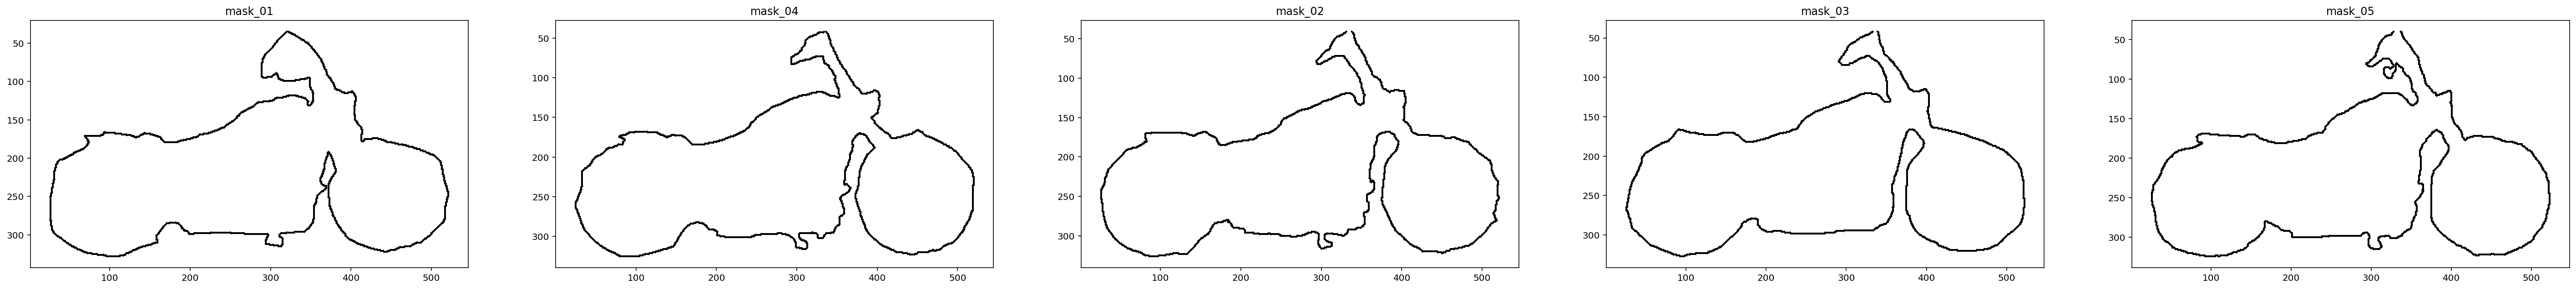

In [3]:
import os
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import deformetrica as dfca
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

data_path = "images/"
data_base = os.path.join(data_path, 'mask_vtk/')
vtk_files = glob.glob(data_base + "*.vtk")

figsize = 5
f = plt.figure(figsize=(10 * figsize, 1 * figsize))
gs = gridspec.GridSpec(1, len(vtk_files))

for i, vtk_file in enumerate(vtk_files):
    ax = plt.subplot(gs[0, i])
    
    m = re.findall(r".*\/(.*)\..*", vtk_file)
    target_id = m[0]
    target_points__raw, _, target_connectivity__raw = dfca.io.DeformableObjectReader.read_file(vtk_file, extract_connectivity=True)

    p = target_points__raw
    c = target_connectivity__raw
    
    ax.plot([p[c[:, 0]][:, 0], p[c[:, 1]][:, 0]], [p[c[:, 0]][:, 1], p[c[:, 1]][:, 1]], 'k', linewidth=2)
    ax.invert_yaxis();
    ax.set_title(target_id)

plt.style.use('default')
plt.show()


## Run Deformetrica

In [1]:
import os
import deformetrica as dfca

data_path = "images/"
data_base = os.path.join(data_path, 'mask_vtk/')
data_base_control_points = os.path.join(data_path, 'mask_initial_control_points/')

iteration_status_dictionaries = []
def estimator_callback(status_dict):
    iteration_status_dictionaries.append(status_dict)
    return True

# instantiate a Deformetrica object
deformetrica = dfca.Deformetrica(output_dir='output', verbosity='INFO')

dataset_specifications = {
    'dataset_filenames': [
        [{'bike': os.path.join(data_base, 'mask_01.vtk')}],
        [{'bike': os.path.join(data_base, 'mask_02.vtk')}],
        [{'bike': os.path.join(data_base, 'mask_03.vtk')}],
        [{'bike': os.path.join(data_base, 'mask_04.vtk')}],
        [{'bike': os.path.join(data_base, 'mask_05.vtk')}]],
    'subject_ids': ['mask_01', 'mask_02', 'mask_03', 'mask_04', 'mask_05'],
}
template_specifications = {
    'bike': {'deformable_object_type': 'polyline',
              'kernel_type': 'torch', 'kernel_width': 10,
              'noise_std': 0.05,
              'filename': os.path.join(data_base, 'mask_03.vtk'),
              'attachment_type': 'varifold'}
}
estimator_options={'optimization_method_type': 'GradientAscent', 'initial_step_size': 1.,
                               'max_iterations': 100, 'max_line_search_iterations': 10, 'callback': estimator_callback}

# perform a deterministic atlas estimation
model = deformetrica.estimate_deterministic_atlas(template_specifications, dataset_specifications,
                                                estimator_options=estimator_options,
                                                model_options={'deformation_kernel_type': 'torch', 'deformation_kernel_width': 10.0, 
                                                                           'dtype': 'float32', 'number_of_time_points': 11, 
                                                                           'initial_control_points': os.path.join(data_base_control_points, 'mask_03_initial_control_points.txt')})

Logger has been set to: INFO
OMP_NUM_THREADS was not found in environment variables. An automatic value will be set.
OMP_NUM_THREADS will be set to 2
>> No specified state-file. By default, Deformetrica state will by saved in file: output/deformetrica-state.p.
>> Removing the pre-existing state file with same path.
>> Reading 200 initial control points from file images/mask_initial_control_points/mask_03_initial_control_points.txt.
>> Momenta initialized to zero, for 5 subjects.
>> Started estimator: GradientAscent
------------------------------------- Iteration: 0 -------------------------------------
>> Log-likelihood = -1.809E+07 	 [ attachment = -1.809E+07 ; regularity = 0.000E+00 ]
>> Step size and gradient norm: 
		1.051E-06   and   9.518E+05 	[ landmark_points ]
		3.029E-06   and   3.301E+05 	[ momenta ]
------------------------------------- Iteration: 1 -------------------------------------
>> Log-likelihood = -1.759E+07 	 [ attachment = -1.759E+07 ; regularity = -1.777E+00 ]
>

>> Step size and gradient norm: 
		3.235E-05   and   1.230E+05 	[ landmark_points ]
		4.664E-05   and   4.706E+04 	[ momenta ]
------------------------------------- Iteration: 25 -------------------------------------
>> Log-likelihood = -2.433E+06 	 [ attachment = -2.422E+06 ; regularity = -1.083E+04 ]
>> Step size and gradient norm: 
		4.852E-05   and   1.409E+05 	[ landmark_points ]
		6.995E-05   and   5.646E+04 	[ momenta ]
>> Step size and gradient norm: 
		2.426E-05   and   1.409E+05 	[ landmark_points ]
		3.498E-05   and   5.646E+04 	[ momenta ]
------------------------------------- Iteration: 26 -------------------------------------
>> Log-likelihood = -2.360E+06 	 [ attachment = -2.349E+06 ; regularity = -1.088E+04 ]
>> Step size and gradient norm: 
		3.639E-05   and   9.296E+04 	[ landmark_points ]
		5.247E-05   and   3.681E+04 	[ momenta ]
------------------------------------- Iteration: 27 -------------------------------------
>> Log-likelihood = -2.319E+06 	 [ attachment = 

		2.334E-05   and   1.390E+05 	[ landmark_points ]
		1.346E-04   and   5.879E+04 	[ momenta ]
>> Step size and gradient norm: 
		1.167E-05   and   1.390E+05 	[ landmark_points ]
		6.731E-05   and   5.879E+04 	[ momenta ]
------------------------------------- Iteration: 49 -------------------------------------
>> Log-likelihood = -1.731E+06 	 [ attachment = -1.717E+06 ; regularity = -1.384E+04 ]
>> Step size and gradient norm: 
		1.751E-05   and   9.159E+04 	[ landmark_points ]
		1.010E-04   and   4.216E+04 	[ momenta ]
------------------------------------- Iteration: 50 -------------------------------------
>> Log-likelihood = -1.686E+06 	 [ attachment = -1.673E+06 ; regularity = -1.391E+04 ]
>> Step size and gradient norm: 
		1.751E-05   and   6.894E+04 	[ landmark_points ]
		5.048E-05   and   2.887E+04 	[ momenta ]
------------------------------------- Iteration: 51 -------------------------------------
>> Log-likelihood = -1.654E+06 	 [ attachment = -1.640E+06 ; regularity = -1.400E

		6.476E-05   and   2.581E+04 	[ momenta ]
------------------------------------- Iteration: 73 -------------------------------------
>> Log-likelihood = -1.144E+06 	 [ attachment = -1.128E+06 ; regularity = -1.639E+04 ]
>> Step size and gradient norm: 
		1.123E-05   and   7.469E+04 	[ landmark_points ]
		6.476E-05   and   2.227E+04 	[ momenta ]
------------------------------------- Iteration: 74 -------------------------------------
>> Log-likelihood = -1.126E+06 	 [ attachment = -1.109E+06 ; regularity = -1.649E+04 ]
>> Step size and gradient norm: 
		1.685E-05   and   5.982E+04 	[ landmark_points ]
		9.714E-05   and   1.871E+04 	[ momenta ]
------------------------------------- Iteration: 75 -------------------------------------
>> Log-likelihood = -1.117E+06 	 [ attachment = -1.101E+06 ; regularity = -1.662E+04 ]
>> Step size and gradient norm: 
		2.527E-05   and   1.016E+05 	[ landmark_points ]
		1.457E-04   and   2.632E+04 	[ momenta ]
>> Step size and gradient norm: 
		1.263E-05 

## Plot results

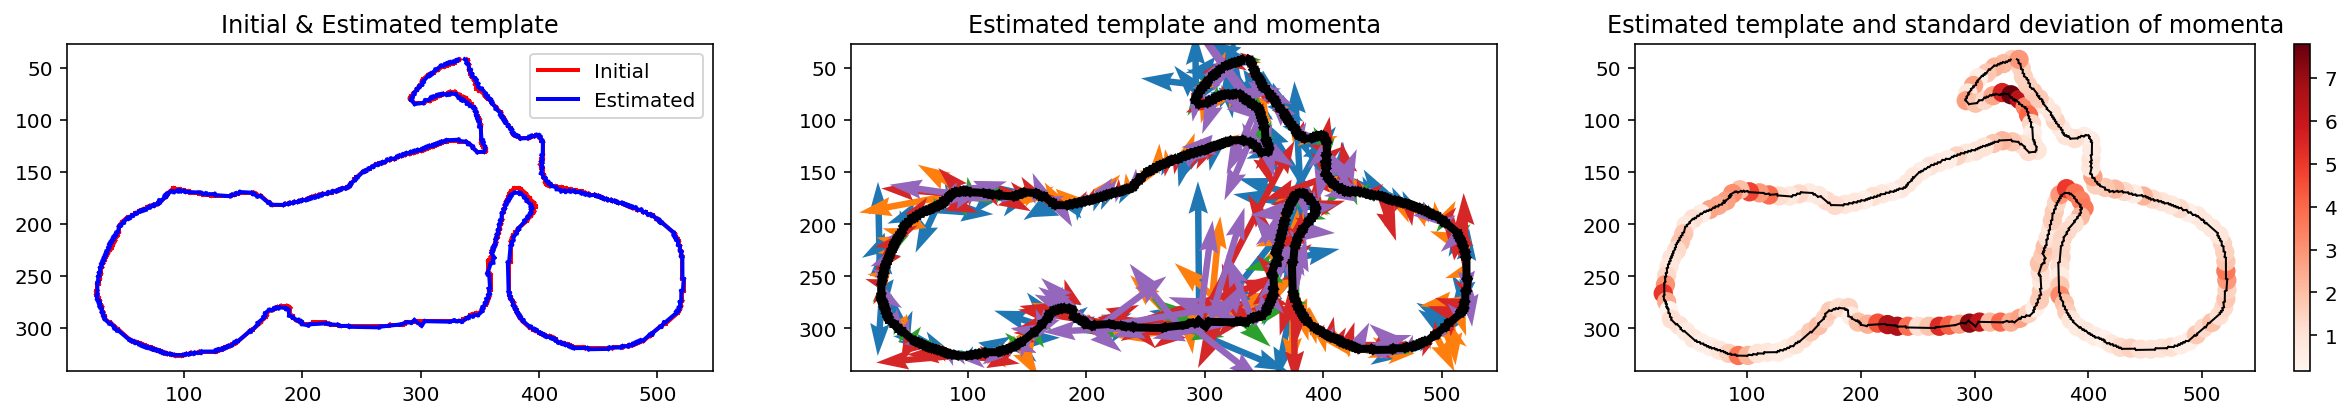

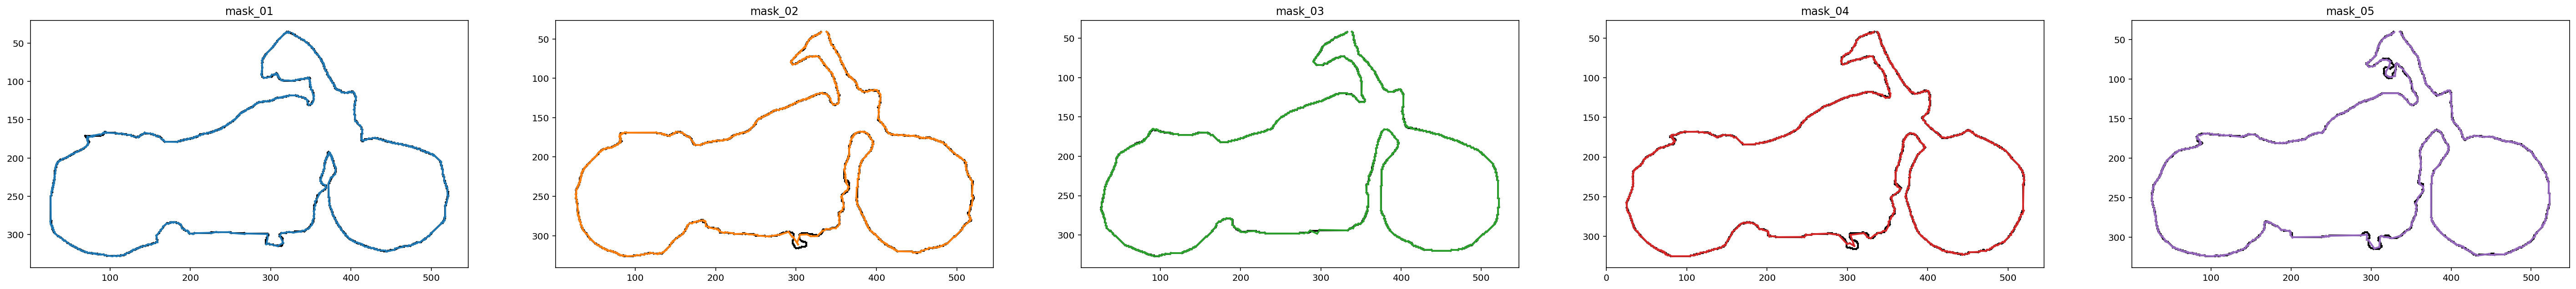

In [2]:
#### LOAD RELEVANT INPUT DATA
import deformetrica as dfca

path_to_template__ini = template_specifications['bike']['filename']
template_points__ini, dimension, template_connectivity__ini = dfca.io.DeformableObjectReader.read_file(path_to_template__ini, extract_connectivity=True)

#### LOAD RELEVANT OUTPUT DATA

fixed_effects = model.fixed_effects
template_points__est = fixed_effects['template_data']['landmark_points']
control_points__est = fixed_effects['control_points']
momenta__est = fixed_effects['momenta']

#### PLOT INITIAL AND ESTIMATED TEMPLATES
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
from math import sqrt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

figsize = 3
f = plt.figure(figsize=(7*figsize, 1*figsize))
gs = gridspec.GridSpec(1, 3, width_ratios=[5, 5, 6])

# Initial template
ax = plt.subplot(gs[0, 0])
p = template_points__ini
c = template_connectivity__ini
ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], linewidth=2, color='red', label='Initial')

# Estimated template
p = template_points__est
ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], linewidth=2, color='blue', label='Estimated')
legend_without_duplicate_labels(ax) #ax.legend(loc='upper left')
ax.invert_yaxis();
ax.set_title('Initial & Estimated template')

# Estimated template and momenta
ax = plt.subplot(gs[0, 1])
x = control_points__est
ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], 'k', linewidth=4)
cmap = cm.get_cmap('tab10')
for i, m in enumerate(momenta__est):
    color = cmap(i % 10)[:3]
    ax.quiver(x[:,0], x[:,1], m[:,0], m[:,1], color=color, width=0.01, scale=75)
ax.invert_yaxis();
ax.set_title('Estimated template and momenta')

# Estimated template and standard deviation of momenta
ax = plt.subplot(gs[0, 2])
x = control_points__est
ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], 'k', linewidth=1)
cmap = cm.get_cmap('tab10')

list_of_momenta =  [[] for i in range(len(momenta__est[0]))]
for i, m in enumerate(momenta__est):
    for j in range(len(m)):
        list_of_momenta[j].append(abs(sqrt(m[j,0] ** 2 + m[j,1] ** 2)))
        
standard_deviation_momenta = [pd.DataFrame(i).describe()[0]['std'] for i in list_of_momenta]
momenta = ax.scatter(x[:,0], x[:,1], s=75, c=standard_deviation_momenta[:], cmap='Reds')
plt.colorbar(momenta)
ax.invert_yaxis();
ax.set_title('Estimated template and standard deviation of momenta') 

#### PLOT RAW VERSUS RECONSTRUCTED DATA
import torch 

figsize = 5
f = plt.figure(figsize=(10*figsize, 1*figsize))
gs = gridspec.GridSpec(1, 5)

for i, momentum__est in enumerate(momenta__est): 
    ax = plt.subplot(gs[0, i])
    color = cmap(i % 10)[:3]
  
    # Load and plot raw target. 
    path_to_target__raw = dataset_specifications['dataset_filenames'][i][0]['bike']
    target_id = dataset_specifications['subject_ids'][i]
    target_points__raw, _, target_connectivity__raw = dfca.io.DeformableObjectReader.read_file(path_to_target__raw, extract_connectivity=True)

    p = target_points__raw
    c = target_connectivity__raw
    ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], 'k', linewidth=2)
    ax.set_title(target_id)
  
    # Compute and plot the reconstruction of the target. 
    model.exponential.set_initial_momenta(torch.from_numpy(momentum__est).to(torch.float32))
    model.exponential.update()
    target_points__rec = model.exponential.get_template_points()['landmark_points'].detach().cpu().numpy()
  
    p = target_points__rec
    c = template_connectivity__ini
    ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], color=color, linewidth=2)
    ax.invert_yaxis();

plt.style.use('default')
plt.show()